# Supervised Learning with Structured Data

**PHYS-555 Winter 2020 - Assignment #6**


Copy this notebook, edit and format it as you wish, as long as we can understand you answered the questions, and we can reproduce every cell.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

np.random.seed(39)
tf.random.set_seed(39)

C:\Users\lukep\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Knowledge Part (50%)

You can answer the questions with a notebook cell below each question.


1.  Give at least one metric and one visual method to evaluate classification models. Which data set (training, validation, test) should you use to compute these metrics?  

<font color='green'>A common metric for evaluating classification models is categorical cross entropy. This metric is defined as $$-\sum_{c=1}^M y_{o,c} \log(p_{o,c})$$ where $c$ is a specific class, $M$ is the number of classes, $y_{o,c} \in \{0,1 \}$ and equal to 1 only if the observation $o$ is the same as $c$, and $p$ is the (predicted) probability that an obervation$ o$ belongs to a class $c$. This loss function is largest when the model makes incorrect predictions (i.e. $p_{o,c=o}$ is small).

A common visual method to evaluate classification models is the ROC curve (for binary classification with positives and negatives). By altering the "cut-off" probability for something to be classified as a positive in a continuous manner, one can see how many true positives and false positives would be classified on some sort of validation set.

1. When using the loss function, the training and validation should each be used to evaluate the metric, however they should be used in different ways. The metric computed on the training set should be used to tune the model during training and in speical cases (for example when training a neural network), the loss function can also be computed on the validation set so that early stopping can be implemented- this stops the neural network from overfitting the training sample.
2. When tuning the hyperparameters of your model, one should use the validation set to compute ROC curves. However, when all training is complete (i.e. no more hyperparameter tuning will occur), the ROC curve can also be computed on the test set to verify the strength of the model: but it **should never** be used to tune hyperparameters.
</font>

2. Give at least one metric and one visual method to evaluate predictions from a regression model. Is this metric robust to outlier?  


<font color='green'>A common metric for evaluating predictions in a regression model is the mean squared error. The mean squared error has some notable problems with outliers, however. If the number of training instances is small and the number of outliers is sufficiently large, the mean squared error is not robust to outliers. Another issue is that the mean squared error will punish large differences for large prediction values. One way to avoid this is by using the mean squared logarithmic error: an alternative loss function. </font>

3. How would you regularize a Linear SVM model for a binary classification problem? Can you do multi-class classification with a SVM?



<font color='green'>An SVM is typically regularized using the margin sensitivity hyperparameter $C$ which permits more margin violations between classes but often generalizes better (since hard margin boundires can rarely be drawn between classes). In addition, when using a gaussian RBF kernel (often used in SVM classification) one can reduce the value of $\gamma$ to prevent overfitting.

Multi-class classification can be done with an SVM with sklearn.</font>

4.  Explain the difference between a single Decision Tree and a Random Forest. Which hyper-parameters in a Decision Tree can increase the chance of overfitting? Which hyper-parameters in a Random Forest can prevent overfitting and how?

<font color='green'>A decision tree can be used to perform classification and regression and makes predictions by splitting the parameter space into different regions where each region corresponds to a certain predicted class. It computes these regions through an iterative procedure that involves maximizing either gini or entropy (hyperparameter of the model). The number of splits the decision tree makes is known as the max_depth of the tree: increasing the max_depth often causes overfitting in the model. Another hyperparameter that may affect overfitting is the min_samples_leaf parameter: by setting this value low (an having an unlimited max depth) the model will often have very few samples per region, resulting in significant overfitting.

A Random Forest, on the other hand, is an *ensemble* of decision trees where each tree is trained on different random subsets of the data (these subsets may overlap). In addition, random forests introduce extra randomness in the following way: instead of searching for the best feature when splitting a node, it searches for the best feature from a random subset of features. This results in greater tree diversity. Once all the decision trees have been trained, the random forest classifier takes into account the relative confidence of each tree (for a particular point in feature space) and makes a classification on that point using a voting classifier among all the trees. The n_estimators parameter is the number of decision trees used in a random forest: increasing this will reduce overfitting by having a greater number of estimators contributing to the classification of a particular point in feature space (similar to regression of the mean- while each decision tree may make a very different prediction, they will, on average, make a better prediction when many trees are used since the error inherent to one decision tree is independent of the error inherent in another decision tree). Another hyperparameter used to avoid overfitting in random forests is max_samples, which controls how many instances are used to train each decision tree. It is set to 1.0 by default meaning all the instances are used to train each decision tree: reducing this can help prevent overfitting in certain cases by increasing the "randomness" of the random forest and ensuring that errors made by distinct trees are independent. This hyperparameter is especially important when training with large data sets.
</font>

5. Use the following Random Forest model used in the class [notebook](https://colab.research.google.com/drive/1Jp2E8iAIz0xC_trTq4G3bIpIZmNom1DQ) with the [galaxy redshift data set](https://coursespaces.uvic.ca/mod/resource/view.php?id=1415479): 
```
RandomForestRegressor(n estimators=1, criterion=’mse’,
                      max_depth=50, min_samples_split=2, 
                      min_samples_leaf=2, max_leaf nodes=None,
                      bootstrap=True)
```
Evaluate your model on a 80/20 split between training and validation. Evaluate how the model performance changes when you increase the number of trees to 5 and to 100.

In [2]:
inp1 = np.loadtxt('inp_redshift.txt')
tar1 = np.loadtxt('tar_redshift.txt')
X_tr, X_va, Y_tr, Y_va = train_test_split(inp1, tar1, test_size=0.2)

<font color='green'>Since no Standard Scaling is needed for a random forest we can fit the model on the data immediately.</font>

In [3]:
clf1 = RandomForestRegressor(n_estimators=1, criterion='mse',
                      max_depth=50, min_samples_split=2, 
                      min_samples_leaf=2, max_leaf_nodes=None,
                      bootstrap=True)
clf5 = RandomForestRegressor(n_estimators=5, criterion='mse',
                      max_depth=50, min_samples_split=2, 
                      min_samples_leaf=2, max_leaf_nodes=None,
                      bootstrap=True)
clf100 = RandomForestRegressor(n_estimators=100, criterion='mse',
                      max_depth=50, min_samples_split=2, 
                      min_samples_leaf=2, max_leaf_nodes=None,
                      bootstrap=True)
clf1.fit(X_tr, Y_tr)
clf5.fit(X_tr, Y_tr)
clf100.fit(X_tr, Y_tr)

err1 = mean_squared_error(Y_va, clf1.predict(X_va))
err5 = mean_squared_error(Y_va, clf5.predict(X_va))
err100 = mean_squared_error(Y_va, clf100.predict(X_va))

print('Error from forest with 1 tree: {:.6f}'.format(err1))
print('Error from forest with 5 trees: {:.6f}'.format(err5))
print('Error from forest with 100 trees: {:.6f}'.format(err100))

Error from forest with 1 tree: 0.021319
Error from forest with 5 trees: 0.014209
Error from forest with 100 trees: 0.011904


<font color='green'>Clearly as the number of trees increases, the error (MSE) between predictions and actual values in the validation set decreases. While the error significantly decreases from 1 to 5 trees, it does not decrease as much from 5 to 100 trees which might suggest that 100 is an excessive number of trees to use in this particular regression problem.</font>

6. Give a simple explanation of the difference between Bagging and Boosting for Decision Trees.

<font color='green'>
    
1. Bagging refers to training many different decision trees on random subsets of the data (these subsets can be overlapping)
    
2. Boosting is an iterative procedure. One first trains a base classifier (a single decision tree) on all the training instances. The relative weights of all the misclassified instances are then increased, and the classifier is trained again. This is done over and over and finally one obtains an ensemble of decision trees (random forest) which are used to make predictions on some data set. 

In summary, both bagging and boosting involve creating an ensemble of decision trees to make predictions, but bagging uses different random subsets to make each tree and boosting uses errors in past trees (iterative procedure) to make an ensemble.
</font>

7. Is there any difference between a one neuron Neural Network and a Logistic Regression model? What happens if we use a ReLU activation  instead of a sigmoid activation function in the Neural Network model for a binary classification? 

<font color='green'> A one neuron neural network (perceptron) that uses a logistic activation function and is optimized using gradient descent is equivalent to a logistic regression classifier. If a ReLU activation function is chosen instead of a sigmoid activation function for binary classification then the model will not converge to a viable solution (classification requires a sigmoid-like function).</font>

8. What is the aim of back-propagation? Could you train a one layer Neural Network without back-propagation?

<font color='green'>In a neural network back propagation is used to determine the magnitude to which each individual neurons weight contributed to the error output by the network for a particular training instance. If the training labels have only one output then a one layer neural network would consist of a single neuron. Suppose one wishes to fit a best fit line to their data. If one uses an identity activation function for the neuron (i.e. returns the same value as its given) then one could simply used the closed form solution for a best fit line to adjust the weights of the network with no back propagation needd.</font>

9. What is the hyper-parameter in a one neuron Neural Network model? In training a Multi-Layer Perceptron model, give at least one method to avoid overfitting.

<font color='green'>The hyperparameter in a one neuron neural network is the activation function. Ina multi-layer perceptron model, one can use early stopping (provided they have a validation set) to avoid overfitting. Another method to avoid overfitting is to use regularizers on the neural network's weights. A final method is to use dropout when training the neural network where some neurons are randomly dropped during certain epochs during training.</font>

10. Can a sigmoid activation function be in the last layer of a regression neural network model and why? What would be the best choice?

<font color='green'>Using a sigmoid function in neural networks leads to the problem of unstable gradients (for large output values-i.e. argument of sigmmoid function- the gradient is approximately zero leading to a saturated gradient). In addtion, a sigmoid function is only bounded between 0 and 1, if the training labels are unbounded then the sgmoid function would not be able to predict them. For a regression neural network the best option is to simply let the activation function of the last layer be the identity function (returns the sum of weights*inputs+bias).</font>

## Practice Part (50%)

In the practice part, we will take a look at a particular data problem: the prediction of ozone concentration as a factor of other weather-based features in Los Angeles in 1976. 

We will make a model for 3 estimators:
- a Support Vector Machine
- a Random Forest
- a simple Multi-Layer Perceptron


The data is taken from the book Elements of Statistical Learning by Hastie et al., we will use the the [ozone data set](https://web.stanford.edu/~hastie/ElemStatLearn/datasets/LAozone.info.txt)


**Description**

These data record the level of atmospheric ozone concentration from eight daily meteorological measurements made in the Los Angeles basin in 1976.  Although measurements were made every day that year, some observations were missing; here we have the 330 complete cases. The data were given to us by Leo Breiman; he was a consultant on a project from which these data are taken.  The response, referred to as ozone, is actually the log of the daily maximum of the hourly-average ozone concentrations in Upland, California.

Detailed variable names:
* ozone : Upland Maximum Ozone
* vh : Vandenberg 500 mb Height
* wind : Wind Speed (mph)
* humidity : Humidity (%)
* temp : Sandburg AFB Temperature
* ibh : Inversion Base Height
* dpg : Daggot Pressure Gradient
* ibt : Inversion Base Temperature
* vis : Visibility (miles)
* doy : Day of the Year

**Note**

You are free to re-arrange the notebook cells, use more cells, and install packages as you wish. The only requirement is that it has to run on Colab. For modelling, our advice is to limit to using only `scikit-learn` estimators.

**Important**

For each model that you fit (questions 3-4-5):
- describe the cross-validation procedure if any
- describe the data preparation and normalizing if any
- plot the predictions vs. ground truth and print your model metrics.

1. Prepare your notebook with package imports and explore your data. Describe what you observe. The data can be found as a CSV file at [this URL](http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/LAozone.data).

In [4]:
df = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn//datasets/LAozone.data")

<font color='green'> First look at a pairplot of the data.

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
ozone,1.000000,0.607344,-0.013414,0.449224,0.780703,-0.589534,0.214046,0.745578,-0.440989,0.066200
vh,0.607344,1.000000,-0.243664,0.074485,0.808059,-0.504835,-0.148071,0.852021,-0.360080,0.337397
wind,-0.013414,-0.243664,1.000000,0.210293,-0.032070,0.206596,0.335747,-0.179517,0.147227,-0.246444
humidity,0.449224,0.074485,0.210293,1.000000,0.340474,-0.242328,0.647789,0.203648,-0.401008,0.040703
temp,0.780703,0.808059,-0.032070,0.340474,1.000000,-0.532645,0.189242,0.864787,-0.387721,0.238003
ibh,-0.589534,-0.504835,0.206596,-0.242328,-0.532645,1.000000,0.037078,-0.776933,0.386686,0.043400
dpg,0.214046,-0.148071,0.335747,0.647789,0.189242,0.037078,1.000000,-0.095060,-0.125855,-0.154138
ibt,0.745578,0.852021,-0.179517,0.203648,0.864787,-0.776933,-0.095060,1.000000,-0.422372,0.219172
vis,-0.440989,-0.360080,0.147227,-0.401008,-0.387721,0.386686,-0.125855,-0.422372,1.000000,-0.216976
doy,0.066200,0.337397,-0.246444,0.040703,0.238003,0.043400,-0.154138,0.219172,-0.216976,1.000000


<font color='green'> It appears that ozone is correlated most with temperature and IBT (but since IBT and temperature are themselves closely correlated it is likely ozone is simply correlated to temperature). Due to the high correlations between input features it seems that PCA is appropriate for this data set.
    
Lets now look at a plot of temperature and ozone throughout the year.

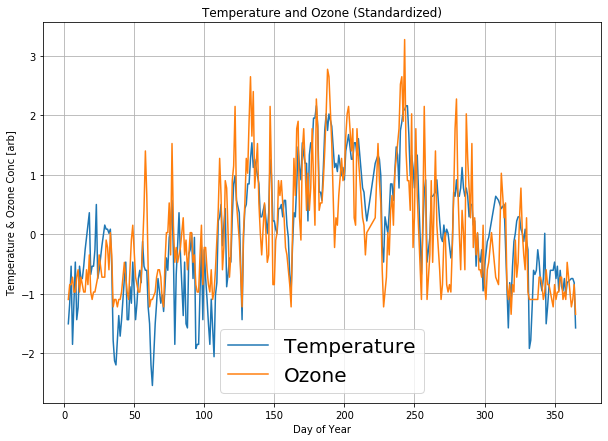

In [6]:
plt.figure(figsize=(10,7))
plt.plot(df['doy'], (df['temp']-df['temp'].mean())/df['temp'].std(), label='Temperature')
plt.plot(df['doy'], (df['ozone']-df['ozone'].mean())/df['ozone'].std(), label='Ozone')
plt.grid()
plt.legend(fontsize=20)
plt.xlabel('Day of Year')
plt.ylabel('Temperature & Ozone Conc [arb]')
plt.title('Temperature and Ozone (Standardized)')
plt.show()

<font color='green'> From this plot we see that when temperature increases/decreases, so too does the ozone concentration. This is not always the case, however: around days 300-350 one can observe rapid decreases in temperature that don't result in rapid changes of ozone. The same can be observed for the first few months. Perhaps the correlation is stronger duing certain months?

In [7]:
# Summer Correlation
corr_sum = df[(df['doy']>90) & (df['doy']<275)].corr()['ozone']['temp']
# Winter Correlation
corr_win = df[(df['doy']<90) | (df['doy']>275)].corr()['ozone']['temp']
print('Summer Correlation: {:.3f}'.format(corr_sum))
print('Winter Correlation: {:.3f}'.format(corr_win))

Summer Correlation: 0.763
Winter Correlation: 0.585


<font color='green'> Thus there is a stronger correlation between ozone and temperature in the summer than in the winter. This is likely due to erratic weather patterns in the winter (such as storms) that affect temperature but not ozone. In a proper analysis, one might add a 1-hot-encoded column that also gives the season during the year for increased classification (for example it seems that the ozone level might depend on temperature **in a completely different fashion** during summer han during the winter).
    


<font color='green'> Lets look at two more highly correlated variables: temperature and inversion base temperature.

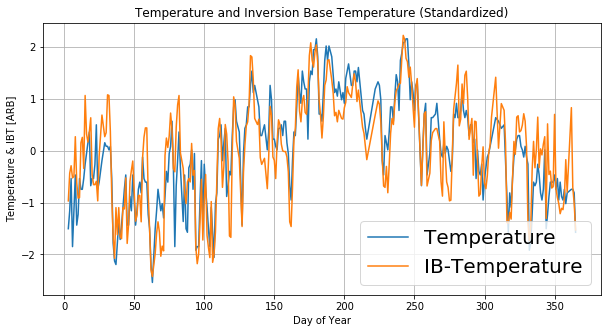

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df['doy'], (df['temp']-df['temp'].mean())/df['temp'].std(), label='Temperature')
plt.plot(df['doy'], (df['ibt']-df['ibt'].mean())/df['ibt'].std(), label='IB-Temperature')
plt.grid()
plt.legend(fontsize=20)
plt.xlabel('Day of Year')
plt.ylabel('Temperature & IBT [ARB]')
plt.title('Temperature and Inversion Base Temperature (Standardized)')
plt.show()

<font color='green'> These are so similar that it is likely that both aren't needed for this classification problem.

<font color='green'> It is likely that most correlations between ozone and other quantities is due to the fact that ozone is correlated with temperature, and temperature is highly correlated to everything.

2. Split your data into a training and a test set. Select (or define one yourself) at least one metric of comparison you will use to evaluate your 3 models. The metric(s) should quantify the quality of the predictions.


<font color='green'> The cell below is everything required to make a simple pipeline for data preprocessing

In [9]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = df.columns.drop(['ozone']).values

pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()) ])


<font color='green'>  Get training and test (validation set in this case since we aren't doing a full blown analysis).

In [10]:
X = pipeline.fit_transform(df)
y = df['ozone'].values

X_tr, X_va, Y_tr, Y_va = train_test_split(X, y, test_size=0.2)

3. Fit a Random Forest model to predict the Upland Maximum Ozone levels from the features. Which of the feature influences the most?

In [11]:
rnd_reg = RandomForestRegressor(n_estimators=100, criterion='mse',
                      max_depth=10, min_samples_split=2, 
                      min_samples_leaf=2, max_leaf_nodes=None,
                      bootstrap=True)
rnd_reg.fit(X_tr, Y_tr)
rnd_err = mean_squared_error(Y_va, rnd_reg.predict(X_va))
print('Error from random forest: {:.6f}'.format(rnd_err))

Error from random forest: 23.474267


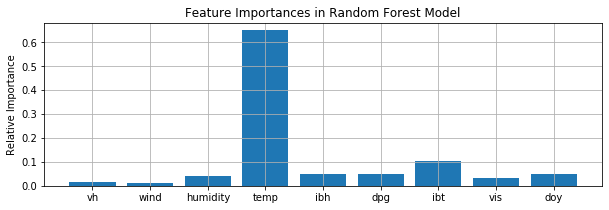

In [12]:
plt.figure(figsize=(10,3))
plt.bar(num_attribs, rnd_reg.feature_importances_)
plt.ylabel('Relative Importance')
plt.title('Feature Importances in Random Forest Model')
plt.grid()
plt.show()

<font color='green'> As predicted the temperature had the highest feature importance in the random forest model.

4. Fit a SVM model with a Radial Basis Function to predict the ozone levels. Do you need to regularize? Take the most important feature you determined in the previous question and inspect whether you see a bias in the predictions, for example in plotting the residual between the predicted and ground truth vs. an input feature.

<font color='green'> Here we fit an SVM regressor on the data. After a few trials, it was determined that $C=10$ was the best option for the regularization parameter $C$ (in terms of SVM this is a high value of C- so little regularization is needed). It was also observed that setting $C$ very high results in bad predictions, so some regularization is needed.

In [13]:
svm_reg = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0,
              tol=0.001, C=10, epsilon=0.1, shrinking=True,
              cache_size=200, verbose=False, max_iter=-1)
svm_reg.fit(X_tr, Y_tr)
svm_err = mean_squared_error(Y_va, svm_reg.predict(X_va))
print('Error from support vector machine: {:.6f}'.format(svm_err))

Error from support vector machine: 16.997155


<font color='green'> Now we explore whether or not there was bias in the predictions.

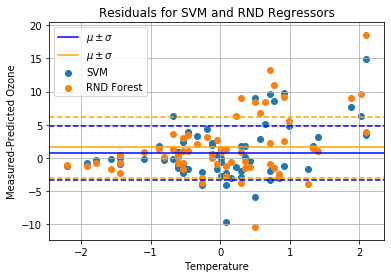

In [14]:
res_svm =Y_va-svm_reg.predict(X_va)
res_rnd =Y_va-rnd_reg.predict(X_va)
plt.scatter(X_va[:,3], res_svm, label='SVM')
plt.scatter(X_va[:,3], res_rnd, label='RND Forest')
plt.xlabel('Temperature')
plt.ylabel('Measured-Predicted Ozone')
plt.axhline(np.mean(res_svm), ls='-', color='b', label='$\mu \pm \sigma$')
plt.axhline(np.mean(res_svm)+np.std(res_svm), ls='--', color='b')
plt.axhline(np.mean(res_svm)-np.std(res_svm), ls='--', color='b')
plt.axhline(np.mean(res_rnd), ls='-', color='orange', label='$\mu \pm \sigma$')
plt.axhline(np.mean(res_rnd)+np.std(res_rnd), ls='--', color='orange')
plt.axhline(np.mean(res_rnd)-np.std(res_rnd), ls='--', color='orange')
plt.legend()
plt.grid()
plt.title('Residuals for SVM and RND Regressors')
plt.show()

<font color='green'> Here we observe a *slight* bias towards larger values although it is evidently very small. Perhaps more interesting is the fact that there exists a temperature range (between 0-1 in standard units) where the prediction of ozone concentration using temperature becomes worse (this is seen in the larger magnitudes of residuals between 0 and 1 on the plot above).

5. Fit a two layers MLP to predict the same ozone level. Use a cross-validation search to experiment the number of neurons in the two layers.

<font color='green'> Here we train a simple two layer network and use a grid search to detemrine the best number of neurons.

In [15]:
def make_model(n_neurons):

    model = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="relu"),
        keras.layers.Dense(n_neurons, activation="relu"),
        keras.layers.Dense(1, name="output") ])

    model.compile(loss='mse',
                  optimizer='nadam',
                  metrics=['accuracy'])
    return model

<font color='green'> Here we use a grid search with 3 cross validation sets and early stopping to prevent overfitting

In [16]:
%%capture
param_grid = dict(n_neurons=[5,10,50,100])
model = KerasRegressor(make_model, batch_size=32)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_result = grid.fit(X_tr, Y_tr, validation_data=(X_va, Y_va), epochs=1000,
                      callbacks=[keras.callbacks.EarlyStopping(patience=5)])

<font color='green'> Now get the best model.

In [17]:
print('Best number of neurons per layer: {}'.format(grid_result.best_params_['n_neurons']))
NN_reg = grid_result.best_estimator_.model

Best number of neurons per layer: 100


<font color='green'> Print the mean squared error.

In [18]:
NN_err = mean_squared_error(Y_va, NN_reg.predict(X_va))
print('Error from neural network: {:.6f}'.format(NN_err))

Error from neural network: 21.192418


<font color='green'> It can be shown that a neural network with far more layers and neurons can compete (to a somewhat closer extent) with the SVM and random forest:

In [19]:
%%capture
def make_model(n_neurons):

    model = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="relu"),
        keras.layers.Dense(n_neurons, activation="relu"),
        keras.layers.Dense(n_neurons, activation="relu"),
        keras.layers.Dense(n_neurons, activation="relu"),
        keras.layers.Dense(n_neurons, activation="relu"),
        keras.layers.Dense(1, name="output") ])

    model.compile(loss='mse',
                  optimizer='nadam',
                  metrics=['accuracy'])
    return model

NN_reg = make_model(n_neurons=30)
NN_reg.fit(X_tr, Y_tr, validation_data=(X_va, Y_va), epochs=1000,
                      callbacks=[keras.callbacks.EarlyStopping(patience=5)])

In [20]:
NN_err = mean_squared_error(Y_va, NN_reg.predict(X_va))
print('Error from neural network: {:.6f}'.format(NN_err))

Error from neural network: 16.857848


<font color='green'> Lets see if the neural network also has problems with that particular temperature region that the random forest and SVM had trouble with.

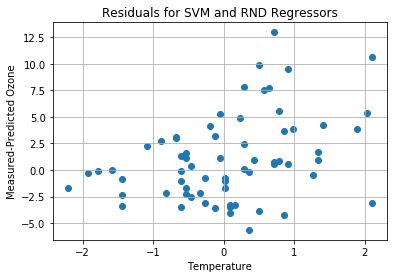

In [21]:
res_NN =Y_va-NN_reg.predict(X_va).flatten()
plt.scatter(X_va[:,3], res_NN)
plt.xlabel('Temperature')
plt.ylabel('Measured-Predicted Ozone')
plt.grid()
plt.title('Residuals for SVM and RND Regressors')
plt.show()

<font color='green'> Once again we observe the same issue with the 0 to 1 temperature region.

6. Compare your 3 models. Discuss briefly.

<font color='green'> The errors made by all 3 models seem to be connected: the model struggles to make predictions in the temperature (standard scaled) region 0 to 1. This suggests that these errors are inherent to the data set (predictability of ozone concentration using temperature is simply not as viable at these temperatures due to some underlying physical processs). In terms of MSE the SVM performed best. Note, however, that this is only for one particular split of the training and validation data; since the MSE is so close for each model, it is likely that that a choice in a different validation set would result in a different model performing the best. This is in fact the case: try replacing the random seed with different values (I set it to 42 by default) and you'll see that in some cases the random forest performs best. In addition, some cases find the optimal number of neurons for the neural network to be 10, and in some cases the neural network with many layers and neurons performs *much* better than the basic neural network.
    
The reason for such variation in the quality of each model is simply due to the small data set: only approximately 300 points. For machine learning tasks this consistutes a very small amount of data, and removing 20% of the data in the validation set can drastically change the training set (in the case of a large amount of samples the removal of the validation set from training has much less of an effect). 

For a final interesting analysis we can see if the **mean value** of each prediction across all estimators is closer to the real data. If some errors made in each regressor are indepedent of eachother, this might be the case.

In [22]:
avg_va  = 1/3 * (NN_reg.predict(X_va).flatten() \
                 + rnd_reg.predict(X_va).flatten() \
                 + svm_reg.predict(X_va).flatten() )
err = mean_squared_error(Y_va, avg_va)
print('MSE from combined predictions: {:.6f}'.format(err))

MSE from combined predictions: 16.402680


<font color='green'> In this case the ensemble predicts better than both the neural network and the random forest but not the support vector machine. For some random seeds (again you can change this from 42 at the top and re-run the code), the ensemble actually makes better predictions than all three of the regressors (see random seed 39 for example- a case where the random forest performs unusually bad and the neural network performs much better - here the combined predictions have a lower MSE than each of the three seperate classifiers).